# Static run, standard reduction

In this tutorial, we show how to reduce raw data for static (non-pump-probe) runs using standard processing. By standard processing, we mean no XGM normalisation. Each frame is averaged over all trains.

We start by importing the modules we are going to use:

In [1]:
import numpy as np
import extra_data as ed
import extra_geom as eg
import toolbox_scs.detectors as tbdet
import euxfel_scs_tools as scs

In the following cell, we define run-specific information:

In [2]:
proposal = 2530  # proposal number
run = 51  # run number
pattern = ['image', 'dark'] * 99 + ['endimage']  # the pattern of frames in each train
dirname = 'processed_runs_xgm'  # directory where we are going to save processed data

The length of `pattern` list must be the same as the number of frames per train. `dirname` can be any path, but in the case of reducing data, the resulting files cannot be written if you do not have writing priviledges in that directory. Accordingly, it is most safe to keep all files you process in your user directory.

## Data reduction

From the notebook `scs.reduction_std` can be called. This function is going to submit 16 jobs to the queue (one per DSSC module). Function's signature is:

```
scs.reduction_std(proposal, run, pattern, frame_types=None, trains=None, njobs=40, dirname=None)
```

The individual arguments are:

- `proposal` - proposal number
- `run` - run number
- `pattern` - the pattern of frames in each train
- `frame_types` - a list of frame types that are reduced. Its elements must be from `pattern`. It defaults to `None` and all frame types found in pattern will be processed.
- `trains` - the list of train indices whose frames are reduced. It defaults to `None` and all trains in the run will be summed.
- `njobs` - the number of jobs executed on each node
- `dirname` - directory name where reduced files are going to be saved

In most cases, you do not need to worry about arguments with default values, only `proposal`, `run`, `pattern`.

Let us say we want to reduce all frame_types. The function call is:

In [3]:
scs.reduction_std(proposal=proposal, run=run, pattern=pattern, dirname=dirname)

Submitted 16 slurm jobs to the queue. Please wait for jobs to complete.


After some time (in my case 3 min), all jobs are completed and in `dirname` directory `run_51` is created. Inside that directory, 16 `.h5` files are created with names `module_NUM_std.h5`, where `NUM` is the module number (0, 1, 2,... 15). In each HDF5 file, the following arrays are saved:

- (single or multiple) `FRAME_TYPE_std`, where `FRAME_TYPE` are the element in the list we passed via `frame_type`. If we did not pass anything, all frame types found in pattern will be reduced.

In addition, two more directories are created:

- `slurm_log`, where all `.out` files are saved
- `autogenerated_scripts`, where all scripts for individual nodes are saved

These directories are used for debugging only and can be deleted.

## Reduced data reading

In order to read all files previously created files and combine them into `xarray`, `scs.read` function can be called. Its signature is:

```
scs.read(dirname, run, reduction_type, data)
```

The individual arguments are:

- `dirname` - directory name where reduced files were saved
- `run` - run number
- `reduction_type` - this is the type of reduced data read. In our case, we use `std`.
- `data` - An array we want to read. Because our pattern has three frame types (image, dark, and end_image), we can ask for `image_std`, `dark_std`, or `endimage_std`.

Let us read the data now. We are going to read `image` and `dark` frame types.

In [51]:
image_std = scs.read(dirname=dirname, run=run, reduction_type='std', dataset='image_std')
dark_std = scs.read(dirname=dirname, run=run, reduction_type='std', dataset='dark_std')

Each array has the following shape:

In [4]:
image_std.shape

(99, 16, 128, 512)

Those elements are:

- 99 - number of frames of `frame_type`
- 16 - number of modules
- 128 and 512 - number of pixels

They are xarrays and the coordinates can be found in the output representation.

In [6]:
image_std

<xarray.DataArray (frame: 99, module: 16, x: 128, y: 512)>
array([[[[83.03015242, 89.56080186, 79.4600729 , ..., 66.1065275 ,
          63.19748178, 74.17345924],
         [80.79473161, 85.83979457, 83.01789264, ..., 73.61497681,
          76.04390325, 66.14993373],
         [90.49966865, 79.79340623, 77.64645461, ..., 78.29638834,
          65.76623592, 71.59476474],
         ...,
         [69.34973492, 60.71222664, 62.96073559, ..., 76.07355865,
          87.8462558 , 75.67379059],
         [70.14363817, 71.97962227, 74.14181577, ..., 63.73889993,
          80.51308814, 77.07206759],
         [72.08962889, 77.49519549, 69.83697813, ..., 77.28462558,
          84.34343936, 75.76805832]],

        [[80.78230616, 93.20377734, 89.3480782 , ..., 78.28644798,
          82.67760106, 80.6797548 ],
         [73.81030484, 76.55947647, 79.45576541, ..., 66.65308151,
          67.28793903, 70.02037773],
         [81.97365805, 78.48856859, 77.9140159 , ..., 74.14396952,
          69.61978131, 81.62574553],
...
         [71.2069594 , 74.35559238, 77.2019884 , ..., 77.54084507,
          82.36702568, 80.98492129],
         [71.75625518, 74.38210439, 70.41275891, ..., 83.57083679,
          78.88947804, 70.0079536 ],
         [70.78574979, 71.83927092, 66.91333886, ..., 83.32013256,
          84.43927092, 81.73338857]],

        [[75.31013917, 73.98724321, 67.9454937 , ..., 67.05384361,
          86.63518887, 76.52319417],
         [71.68538767, 73.0072896 , 71.45311465, ..., 70.91003976,
          71.41053678, 82.56941683],
         [68.82952286, 80.81908549, 79.10685885, ..., 71.04986746,
          72.32902584, 75.54870775],
         ...,
         [65.02269715, 66.49138502, 75.56461233, ..., 70.87640822,
          82.03313453, 67.71951624],
         [68.59824387, 65.65208748, 71.56792578, ..., 77.53909874,
          66.66616965, 72.62176938],
         [65.45609675, 71.69980119, 68.9055666 , ..., 83.09526176,
          80.00099404, 75.1240888 ]]]])
Coordinates:
  * frame    (frame) int64 0 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96 97 98
  * module   (module) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * x        (x) int64 1 2 3 4 5 6 7 8 9 ... 120 121 122 123 124 125 126 127 128
  * y        (y) int64 1 2 3 4 5 6 7 8 9 ... 504 505 506 507 508 509 510 511 512

## Data analysis simple example

To obtain an image according to Nanna's formula, we also need to use the dark run (number 49). So, we need to process it as well using standard processing:

In [67]:
dark_run = 49  # dark run number

scs.reduction_std(proposal=proposal, run=dark_run, pattern=pattern, dirname=dirname)

Submitted 16 slurm jobs to the queue. Please wait for jobs to complete.


Now we load processed data for the dark run

In [68]:
dr_image_std = scs.read(dirname=dirname, run=dark_run, reduction_type='std', dataset='image_std')
dr_dark_std = scs.read(dirname=dirname, run=dark_run, reduction_type='std', dataset='dark_std')

Formula:

In [70]:
image_std = (np.mean(image_std, axis=0) - np.mean(dark_std, axis=0) -
            (np.mean(dr_image_std, axis=0) - np.mean(dr_dark_std, axis=0)))

and finally assemble an image:

In [75]:
quad_pos = [(-123.0 , 1.72),  # TR
            (-130.0, -110.18),  # BR
            (1.4, -122.78),  # BL
            (2.2, -4.08)]  # TL

geopath = '/gpfs/exfel/sw/software/git/EXtra-geom/docs/dssc_geo_june19.h5'
geom = eg.DSSC_1MGeometry.from_h5_file_and_quad_positions(geopath, quad_pos)

masklist = [(4, 1, 0),
            (13, 0, 0),
            (1, 0, 6)]

dssc_mask = tbdet.quickmask_DSSC_ASIC(geom, masklist)

image, center = geom.position_modules_fast(image_std)

And plot it:

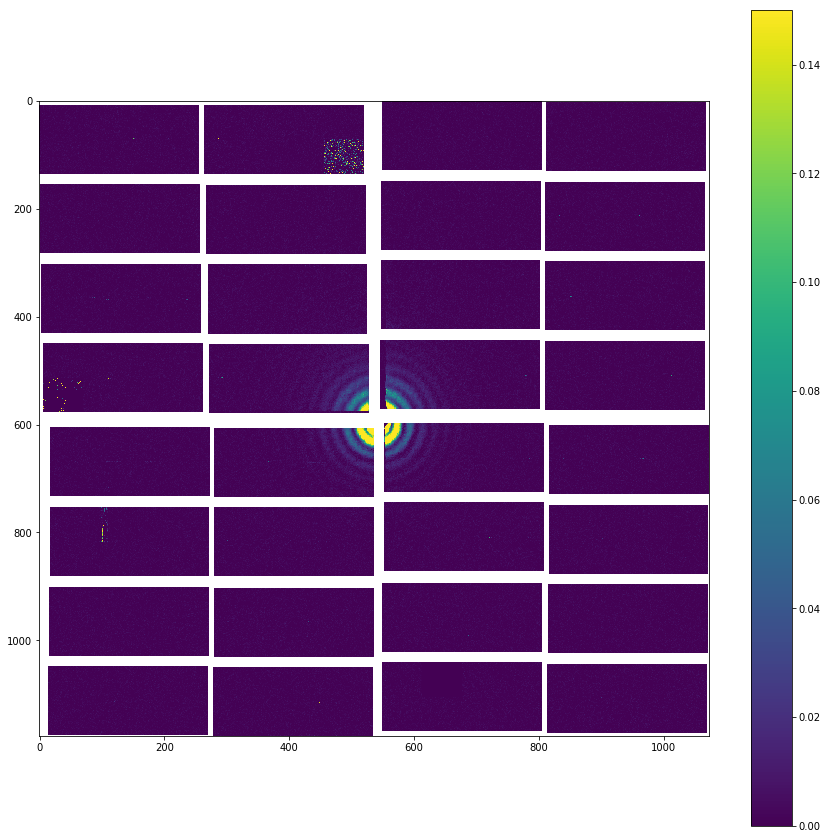

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
plt.imshow(image, vmin=0, vmax=0.15, aspect=204.0/236.0)
plt.colorbar()